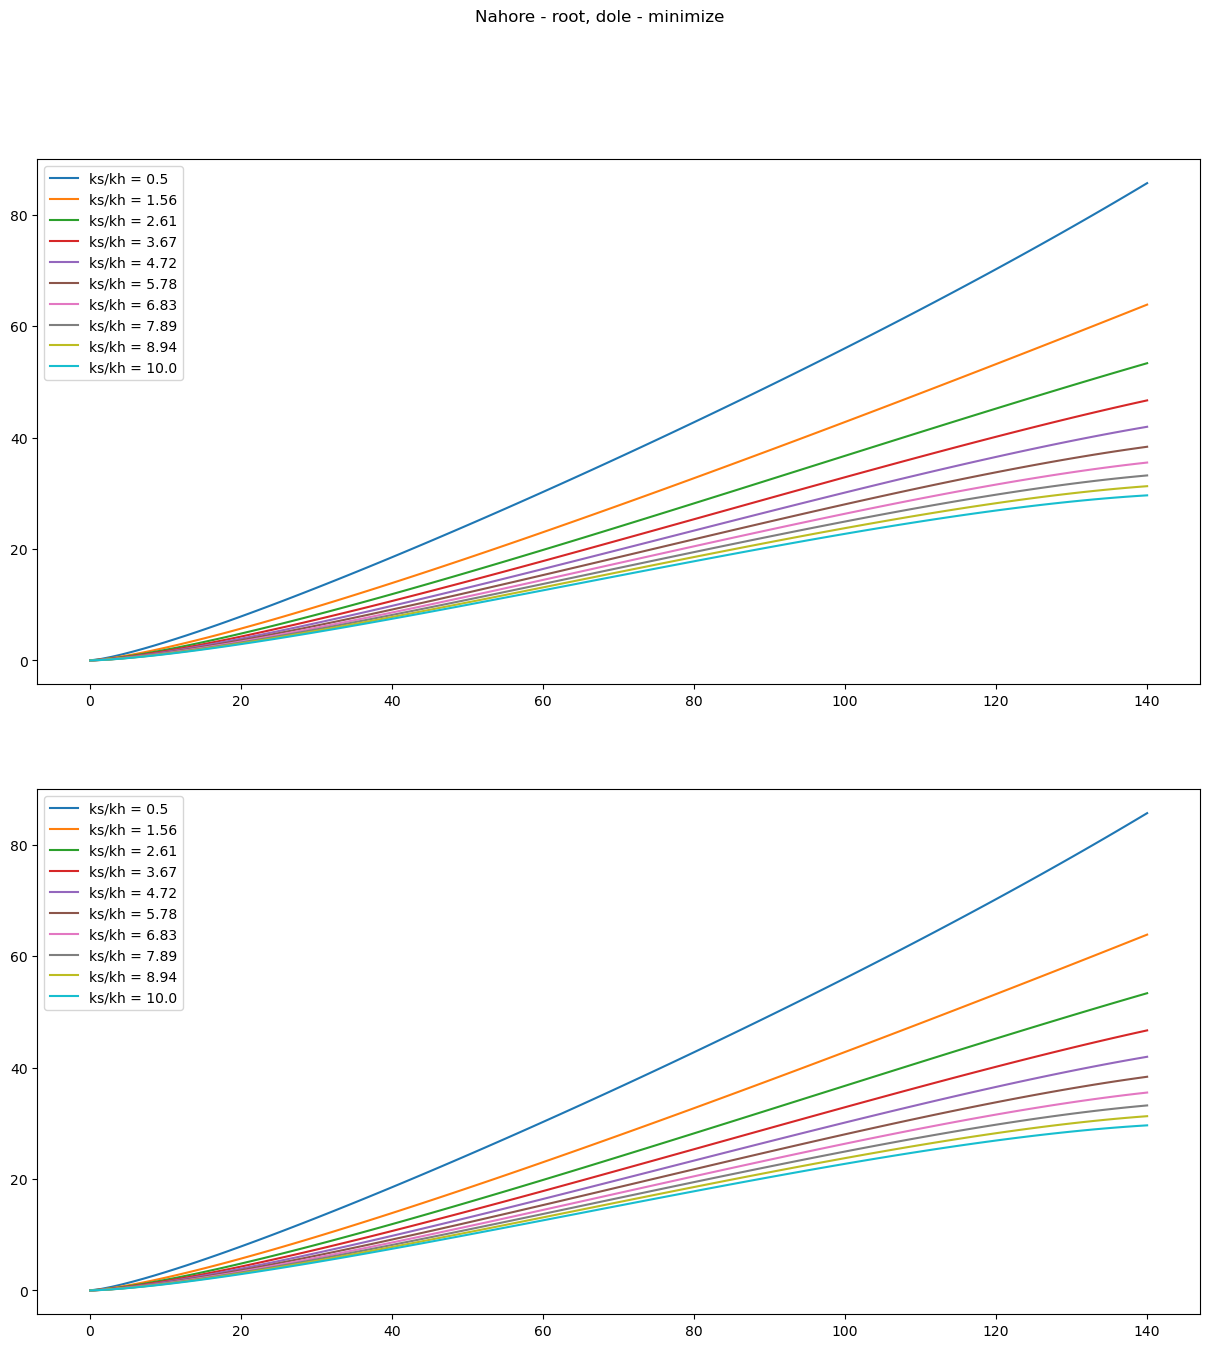

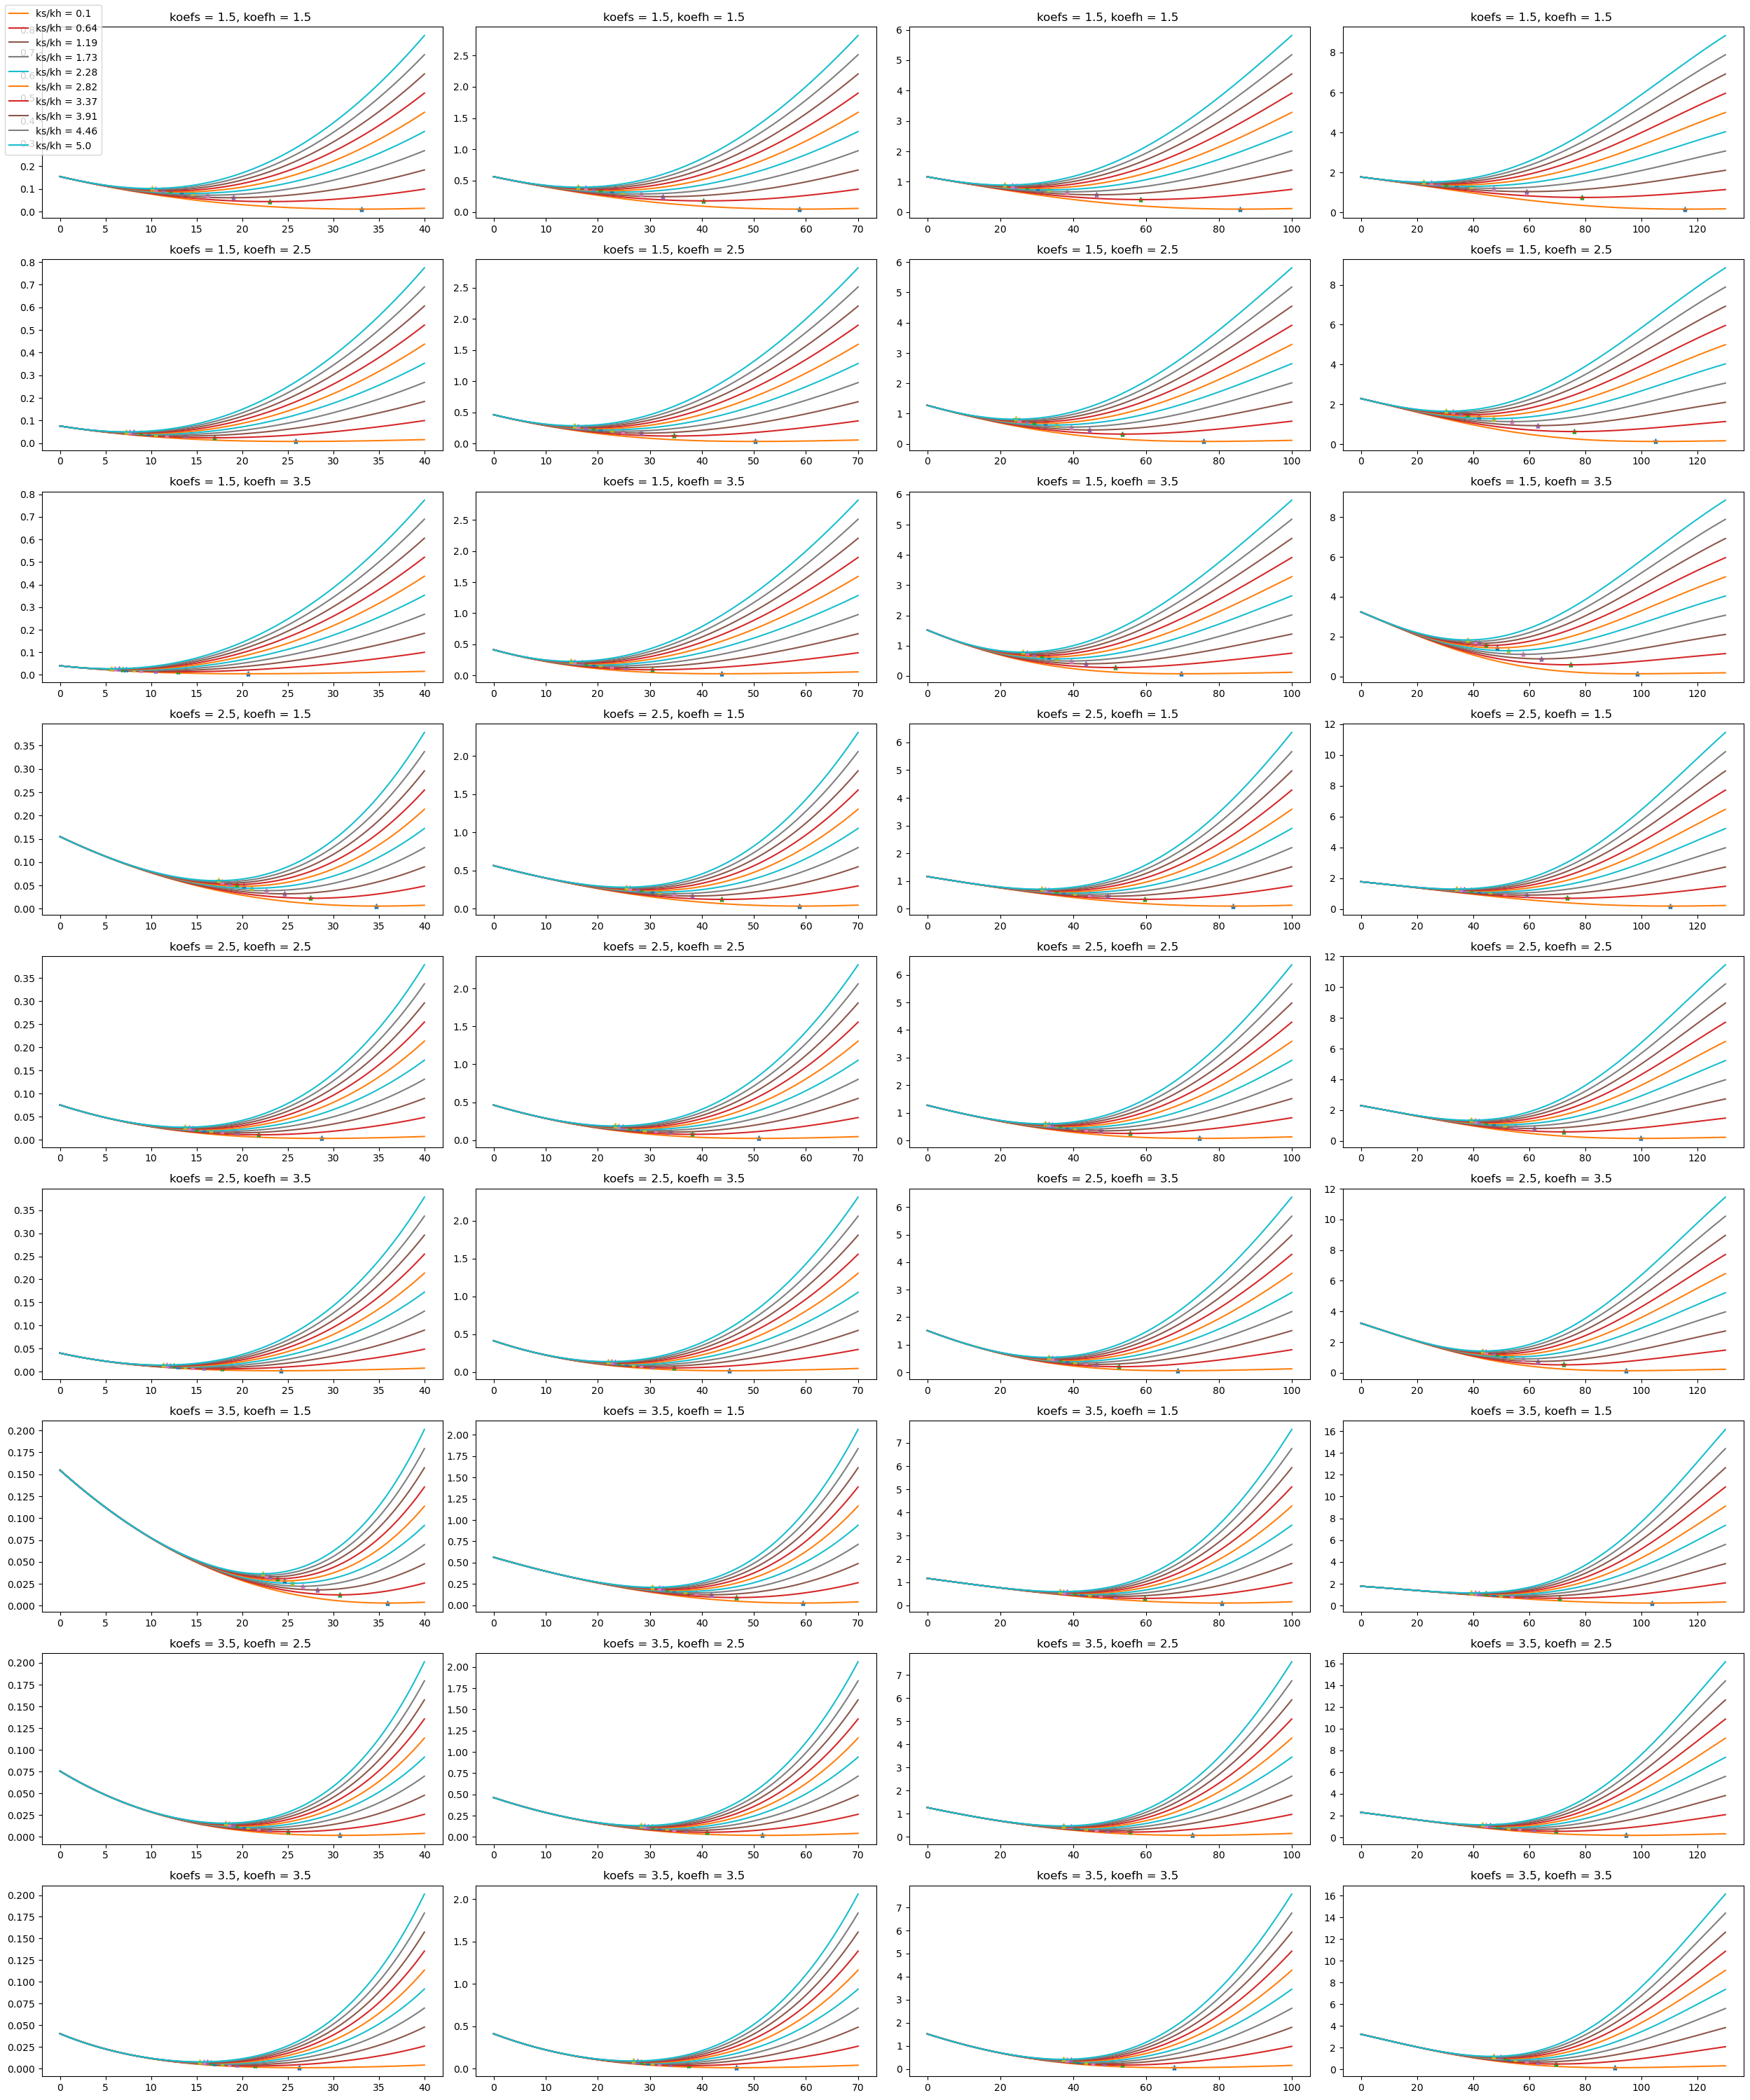

In [1]:
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
# %run "classes_ipynb.ipynb"
sys.path.insert(0, "..")
import classes2
warnings.filterwarnings('ignore')



phis,alfa,pomery,x,koefs,koefh = sp.symbols('phis,alfa,pomery,x,koefs,koefh')
model = classes2.SCHR(phis=phis,alfa=alfa,pomery=pomery,x=x,koefs=koefs,koefh=koefh)

xs, xh = model.geometry_init()
Fs,Fh, Us, Uh = model.nonlinear_spring_init(akt_f=True)
u_celk, dU_celk = model.potential_energy(Us,Uh,xs,xh,phis)
Uc_np, d_Uc_np = model.lambdified(u_celk,dU_celk)

model.graphs_scapula_position(Uc_np, d_Uc_np)
model.graphs_potential_energy(Uc_np)